## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import EarlyStopping

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4949299923193781285
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14314050138016405489
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4817616896
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16532305880527474766
physical_device_desc: "device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11124062806298583634
physical_device_desc: "device: XLA_GPU device"
]


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape , output_unit = 10 , num_nerous = [512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    for i , num in enumerate(num_nerous):
        if i == 0 :
            x = keras.layers.Dense(units = num ,
                                  activation = 'relu',
                                  name = 'hidden_layer'+str(i+1))(input_layer)
        else :
            x = keras.layers.Dense(units = num ,
                      activation = 'relu',
                      name = 'hidden_layer'+str(i+1))(x)
    output_layer = keras.layers.Dense(units = output_unit , 
                               activation = 'softmax',
                               name = 'output_layer')(x)
    model = keras.models.Model(inputs = [input_layer],
                              outputs = [output_layer])
    return model

In [7]:
"""Code Here
設定超參數
"""
BATCH_SIZE = 256
LEARNING_RATE = 1e-3
EPOCHS = 20 
MOMENTUM = 0.95

In [11]:
# monitor='val_loss'  VS  monitor='val_acc'
"""Code Here
設定 callbacks: Earlystop
"""

early_stop1 = EarlyStopping(monitor='val_loss',
                          patience= 5,
                          verbose= 1)
early_stop2 = EarlyStopping(monitor='val_acc',
                          patience= 5,
                          verbose= 1)
optimizers = keras.optimizers.SGD(lr = LEARNING_RATE,
                             nesterov = True ,
                             momentum = MOMENTUM)

model1 = build_mlp(input_shape = x_train.shape[1:])
model1.compile(loss = 'categorical_crossentropy',
              metrics= ['accuracy'],
              optimizer = optimizers)
model1.fit(x_train,y_train,
          epochs= EPOCHS,
          batch_size = BATCH_SIZE,
          validation_data = (x_test,y_test),
          shuffle = True,
          callbacks = early_stop1)

model2 = build_mlp(input_shape = x_train.shape[1:])
model2.compile(loss = 'categorical_crossentropy',
              metrics= ['accuracy'],
              optimizer = optimizers)
model2.fit(x_train,y_train,
          epochs= EPOCHS,
          batch_size = BATCH_SIZE,
          validation_data = (x_test,y_test),
          shuffle = True,
          callbacks = early_stop2)

Epoch 1/20
196/196 [==============================] - 1s 5ms/step - loss: 2.0356 - accuracy: 0.2745 - val_loss: 1.8640 - val_accuracy: 0.3377
Epoch 2/20
196/196 [==============================] - 1s 4ms/step - loss: 1.8052 - accuracy: 0.3622 - val_loss: 1.7643 - val_accuracy: 0.3714
Epoch 3/20
196/196 [==============================] - 1s 4ms/step - loss: 1.7209 - accuracy: 0.3949 - val_loss: 1.6891 - val_accuracy: 0.3979
Epoch 4/20
196/196 [==============================] - 1s 4ms/step - loss: 1.6609 - accuracy: 0.4167 - val_loss: 1.6429 - val_accuracy: 0.4209
Epoch 5/20
196/196 [==============================] - 1s 4ms/step - loss: 1.6111 - accuracy: 0.4352 - val_loss: 1.6044 - val_accuracy: 0.4333
Epoch 6/20
196/196 [==============================] - 1s 4ms/step - loss: 1.5705 - accuracy: 0.4478 - val_loss: 1.5699 - val_accuracy: 0.4416
Epoch 7/20
196/196 [==============================] - 1s 4ms/step - loss: 1.5366 - accuracy: 0.4606 - val_loss: 1.5381 - val_accuracy: 0.4501
Epoch 

196/196 [==============================] - 1s 4ms/step - loss: 1.3399 - accuracy: 0.5301 - val_loss: 1.4258 - val_accuracy: 0.4962
Epoch 16/20
196/196 [==============================] - 1s 4ms/step - loss: 1.3216 - accuracy: 0.5360 - val_loss: 1.4311 - val_accuracy: 0.4899
Epoch 17/20
196/196 [==============================] - 1s 4ms/step - loss: 1.3038 - accuracy: 0.5418 - val_loss: 1.3811 - val_accuracy: 0.5066
Epoch 18/20
196/196 [==============================] - 1s 4ms/step - loss: 1.2859 - accuracy: 0.5496 - val_loss: 1.4125 - val_accuracy: 0.4949
Epoch 19/20
196/196 [==============================] - 1s 4ms/step - loss: 1.2704 - accuracy: 0.5538 - val_loss: 1.3760 - val_accuracy: 0.5127
Epoch 20/20
196/196 [==============================] - 1s 4ms/step - loss: 1.2559 - accuracy: 0.5578 - val_loss: 1.3570 - val_accuracy: 0.5184


In [17]:
results1 = {}

results1['val_loss']={
'train_loss' : model1.history.history['loss'],
'valid_loss' : model1.history.history['val_loss'],
'train_acc' : model1.history.history['accuracy'],
'valid_acc' : model1.history.history['val_accuracy']}
results1['val_acc']={
'train_loss' : model2.history.history['loss'],
'valid_loss' : model2.history.history['val_loss'],
'train_acc' : model2.history.history['accuracy'],
'valid_acc' : model2.history.history['val_accuracy']}

In [14]:
# patience= 10  VS patience= 25

early_stop3 = EarlyStopping(monitor='val_loss',
                          patience= 10  ,
                          verbose= 1)
early_stop4 = EarlyStopping(monitor='val_loss',
                          patience= 25,
                          verbose= 1)
optimizers = keras.optimizers.SGD(lr = LEARNING_RATE,
                             nesterov = True ,
                             momentum = MOMENTUM)

model3 = build_mlp(input_shape = x_train.shape[1:])
model3.compile(loss = 'categorical_crossentropy',
              metrics= ['accuracy'],
              optimizer = optimizers)
model3.fit(x_train,y_train,
          epochs= EPOCHS,
          batch_size = BATCH_SIZE,
          validation_data = (x_test,y_test),
          shuffle = True,
          callbacks = early_stop3)

model4 = build_mlp(input_shape = x_train.shape[1:])
model4.compile(loss = 'categorical_crossentropy',
              metrics= ['accuracy'],
              optimizer = optimizers)
model4.fit(x_train,y_train,
          epochs= EPOCHS,
          batch_size = BATCH_SIZE,
          validation_data = (x_test,y_test),
          shuffle = True,
          callbacks = early_stop4)

Epoch 1/20
196/196 [==============================] - 1s 5ms/step - loss: 2.0382 - accuracy: 0.2756 - val_loss: 1.8659 - val_accuracy: 0.3437
Epoch 2/20
196/196 [==============================] - 1s 4ms/step - loss: 1.8077 - accuracy: 0.3672 - val_loss: 1.7586 - val_accuracy: 0.3816
Epoch 3/20
196/196 [==============================] - 1s 4ms/step - loss: 1.7236 - accuracy: 0.3971 - val_loss: 1.6978 - val_accuracy: 0.4082
Epoch 4/20
196/196 [==============================] - 1s 4ms/step - loss: 1.6641 - accuracy: 0.4175 - val_loss: 1.6439 - val_accuracy: 0.4214
Epoch 5/20
196/196 [==============================] - 1s 4ms/step - loss: 1.6156 - accuracy: 0.4348 - val_loss: 1.6036 - val_accuracy: 0.4402
Epoch 6/20
196/196 [==============================] - 1s 4ms/step - loss: 1.5753 - accuracy: 0.4497 - val_loss: 1.5672 - val_accuracy: 0.4460
Epoch 7/20
196/196 [==============================] - 1s 4ms/step - loss: 1.5398 - accuracy: 0.4625 - val_loss: 1.5513 - val_accuracy: 0.4534
Epoch 

In [18]:
results2 = {}

results2['patience10']={
'train_loss' : model3.history.history['loss'],
'valid_loss' : model3.history.history['val_loss'],
'train_acc' : model3.history.history['accuracy'],
'valid_acc' : model3.history.history['val_accuracy']}
results2['patience25']={
'train_loss' : model4.history.history['loss'],
'valid_loss' : model4.history.history['val_loss'],
'train_acc' : model4.history.history['accuracy'],
'valid_acc' : model4.history.history['val_accuracy']}

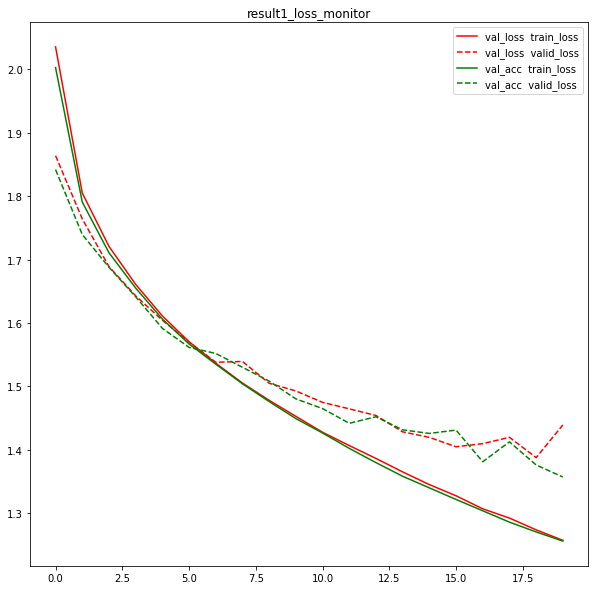

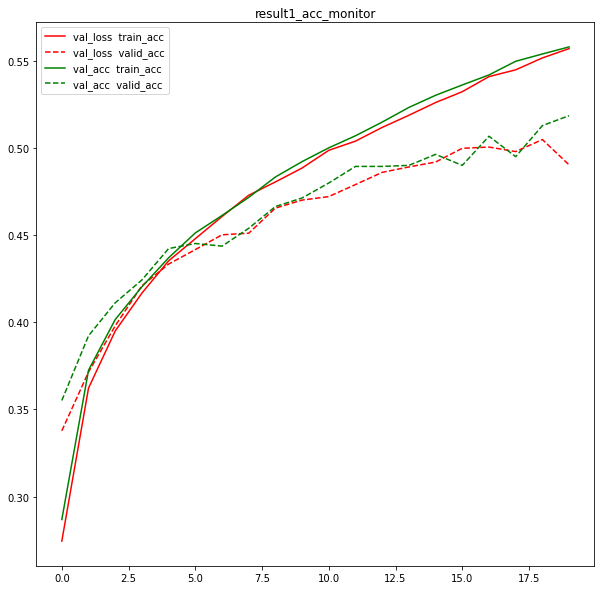

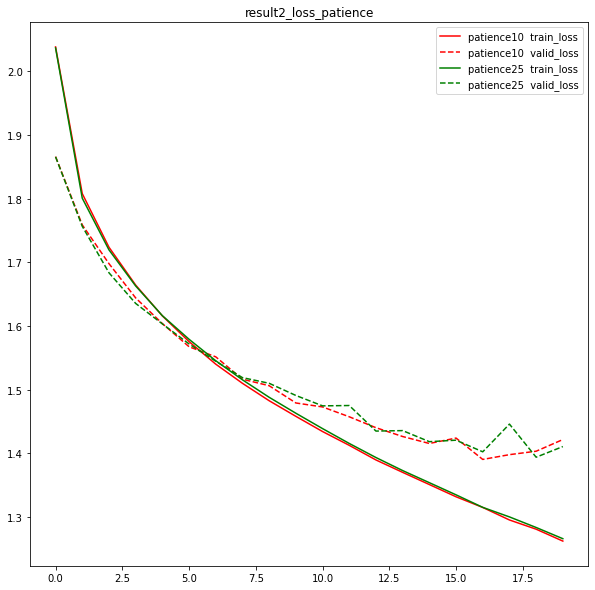

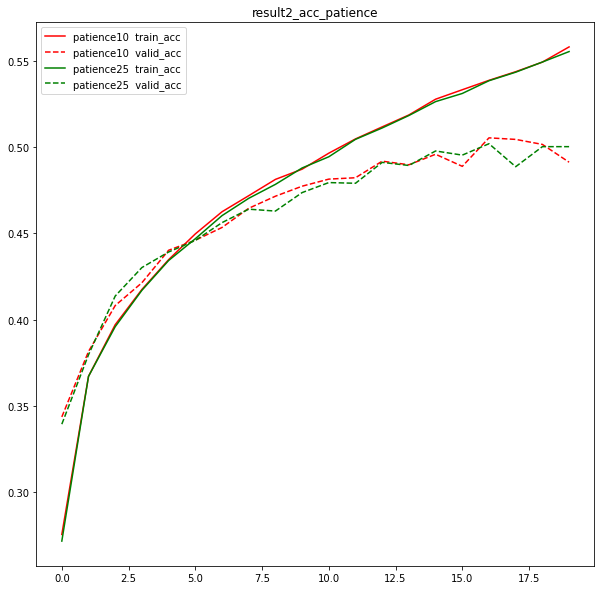

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar=['r','g','b','y','m','c','k']
plt.figure(figsize=(10,10))
for i ,cond in enumerate(results1.keys()):
    plt.plot(range(len(results1[cond]['train_loss'])),results1[cond]['train_loss'],
             '-',label=str(cond)+'  train_loss',color=color_bar[i])
    plt.plot(range(len(results1[cond]['valid_loss'])),results1[cond]['valid_loss'],
             '--',label=str(cond)+'  valid_loss',color=color_bar[i])
plt.title('result1_loss_monitor')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,10))
for i ,cond in enumerate(results1.keys()):
    plt.plot(range(len(results1[cond]['train_acc'])),results1[cond]['train_acc'],
             '-',label=str(cond)+'  train_acc',color=color_bar[i])
    plt.plot(range(len(results1[cond]['valid_acc'])),results1[cond]['valid_acc'],
             '--',label=str(cond)+'  valid_acc',color=color_bar[i])
plt.title('result1_acc_monitor')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,10))
for i ,cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train_loss'])),results2[cond]['train_loss'],
             '-',label=str(cond)+'  train_loss',color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid_loss'])),results2[cond]['valid_loss'],
             '--',label=str(cond)+'  valid_loss',color=color_bar[i])
plt.title('result2_loss_patience')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,10))
for i ,cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train_acc'])),results2[cond]['train_acc'],
             '-',label=str(cond)+'  train_acc',color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid_acc'])),results2[cond]['valid_acc'],
             '--',label=str(cond)+'  valid_acc',color=color_bar[i])
plt.title('result2_acc_patience')
plt.legend(loc='best')
plt.show()